## Housing Price Prediction

<img src='header.jpg' width="600" height="200">


## Dataset
https://www.kaggle.com/harlfoxem/housesalesprediction#kc_house_data.csv

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

## Features
- **id** :a notation for a house

- **date**: Date house was sold

- **price**: Price is prediction target

- **bedrooms**: Number of Bedrooms/House

- **bathrooms**: Number of bathrooms/bedrooms

- **sqft_living**: square footage of the home

- **sqft_lot**: square footage of the lot

- **floors** :Total floors (levels) in house

- **waterfront** :House which has a view to a waterfront

- **view**: Has been viewed

- **condition** :How good the condition is Overall

- **grade**: overall grade given to the housing unit, based on King County grading system

- **sqft_above** :square footage of house apart from basement

- **sqft_basement**: square footage of the basement

- **yr_built** :Built Year

- **yr_renovated** :Year when house was renovated

- **zipcode**:zip code

- **lat**: Latitude coordinate

- **long**: Longitude coordinate

- **sqft_living15** :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

- **sqft_lot15** :lotSize area in 2015(implies-- some renovations)

## Exploratory Data Analysis

In [1]:
#importing packages
import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# read dataset
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
# check first five lines of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#finding no of rows and columns using shape method
df.shape

(21613, 21)

In [6]:
# checking missing values in the dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Visualizing data 

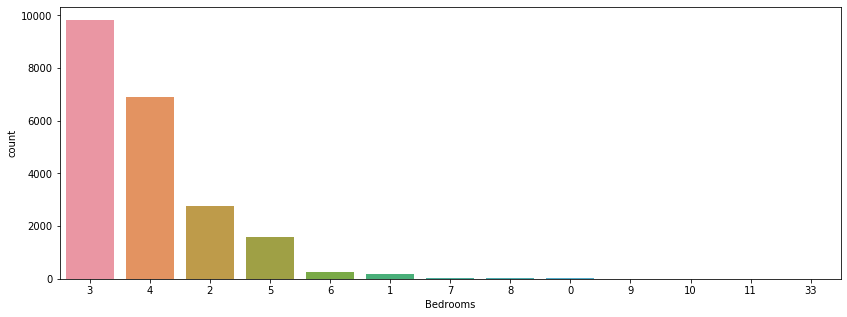

In [7]:
_,ax=plt.subplots(figsize=(14,5))
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)
plt.xlabel('Bedrooms')
plt.show()

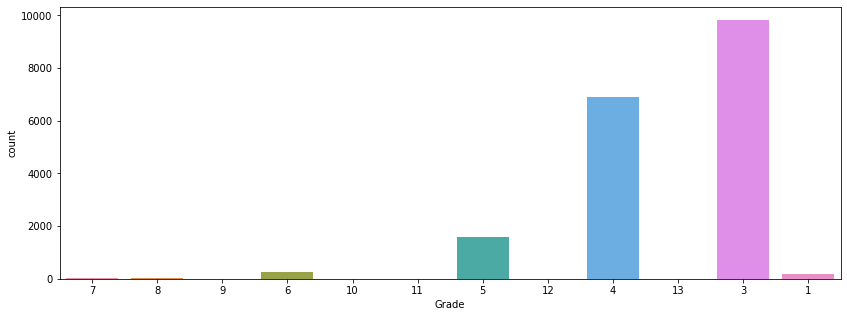

In [8]:
_,ax=plt.subplots(figsize=(14,5))
sns.countplot(df.bedrooms,order=df['grade'].value_counts().index)
plt.xlabel('Grade')
plt.show()

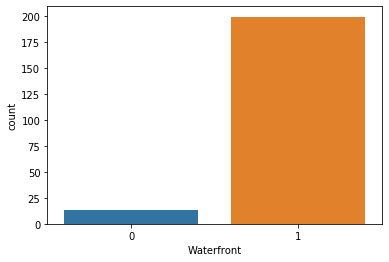

In [9]:
sns.countplot(df.bedrooms,order=df['waterfront'].value_counts().index)
plt.xlabel('Waterfront')
plt.show()

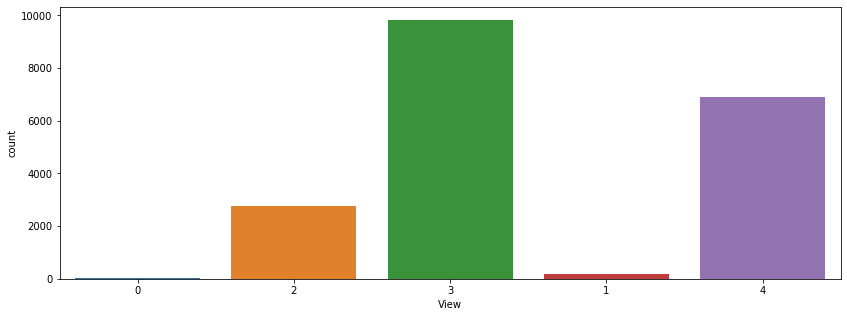

In [10]:
_,ax=plt.subplots(figsize=(14,5))
sns.countplot(df.bedrooms,order=df['view'].value_counts().index)
plt.xlabel('View')
plt.show()

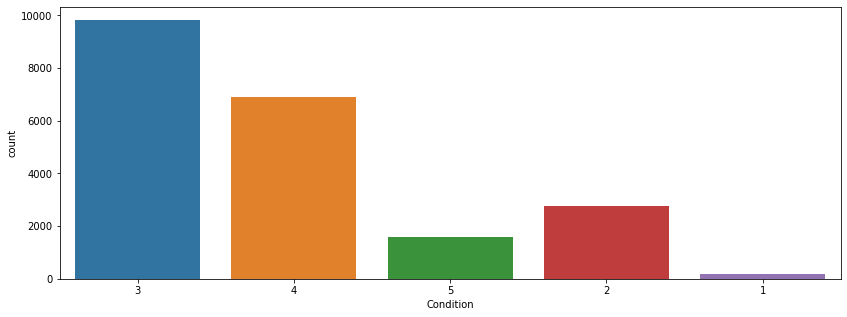

In [11]:
_,ax=plt.subplots(figsize=(14,5))
sns.countplot(df.bedrooms,order=df['condition'].value_counts().index)
plt.xlabel('Condition')
plt.show()

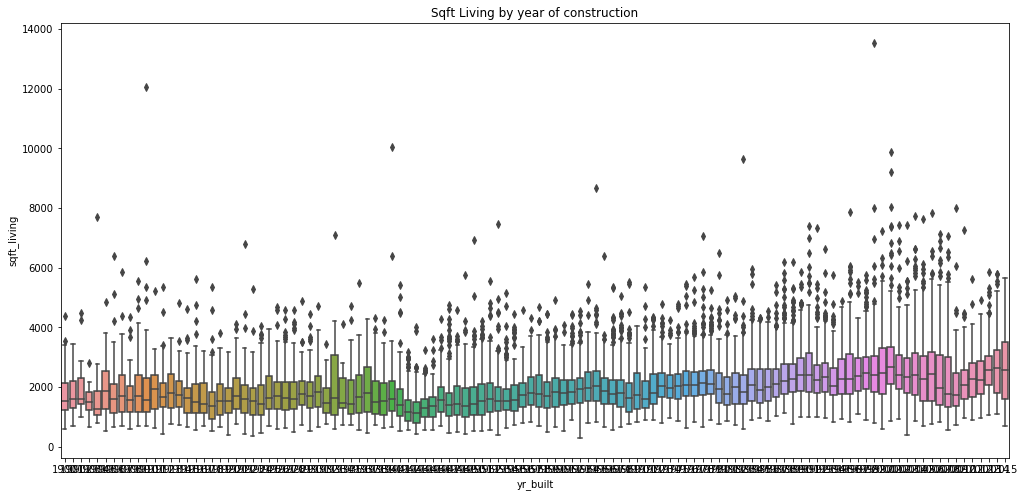

In [12]:
_,ax=plt.subplots(figsize=(17,8))
plt.title("Sqft Living by year of construction")
plt.xlabel('Year of Construction')
plt.ylabel('Square ft living')
sns.boxplot(x=df['yr_built'],y=df['sqft_living'])
plt.show()

Above boxplot shows the house sizes by year of construction. Looking at the medians,it appears that in the early part of the period (1900 to 1940) there was not much change in the typical house size. In the post-war period (1945 to 2000) we see a sustained upward trend in the median house size which perhaps roughly corresponds to the sustained period of economic growth. This trend is reversed between 2000 and 2010 when the economy suffered two significant crashes (the dot-com bubble bursting and the credit crunch). Since 2010, however, there has been a significant upward trend once more. 

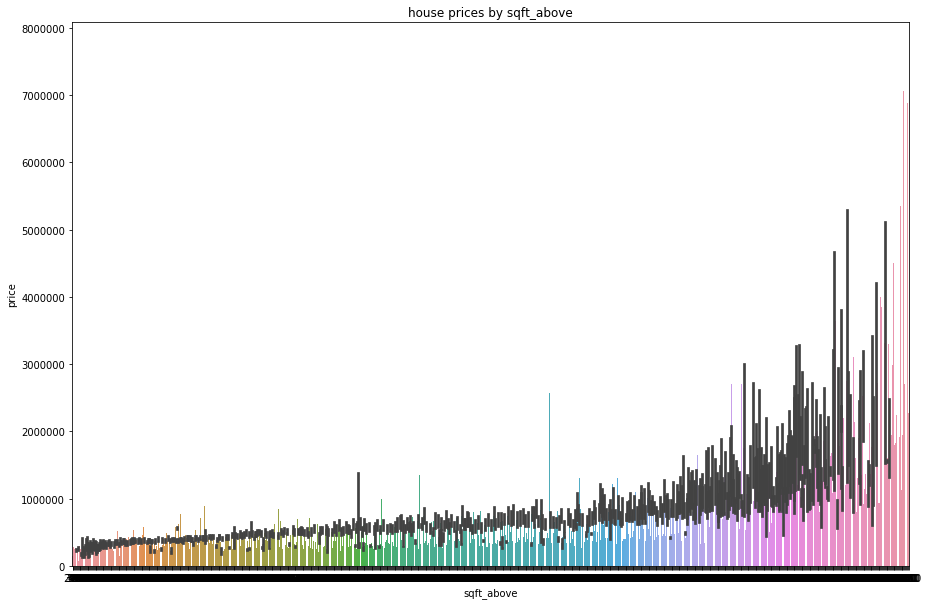

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
#plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)
plt.show()

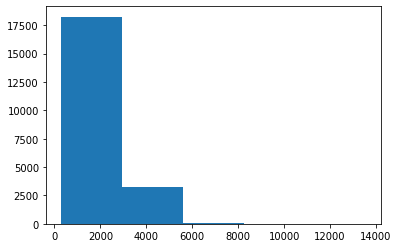

In [14]:
plt.hist('sqft_living',data=df,bins=5)
plt.show()

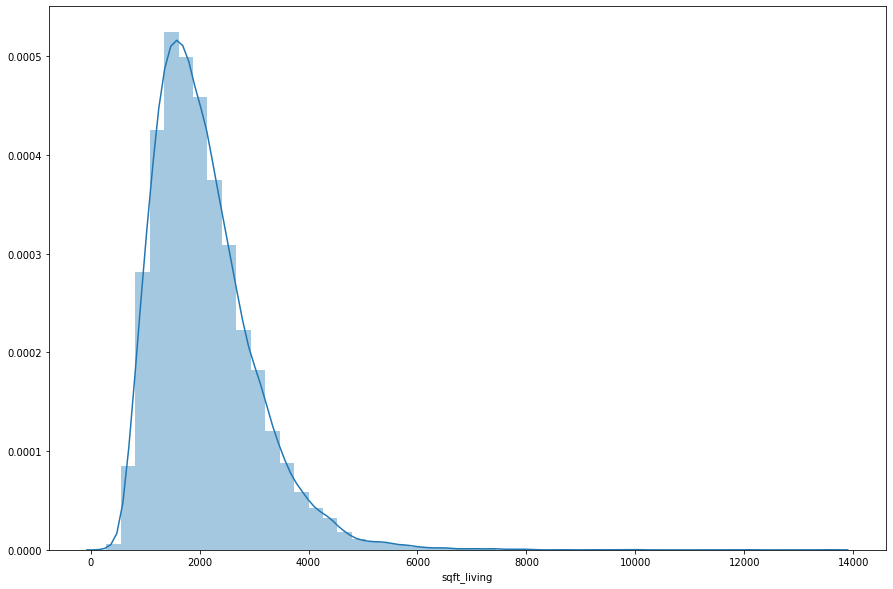

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.show()

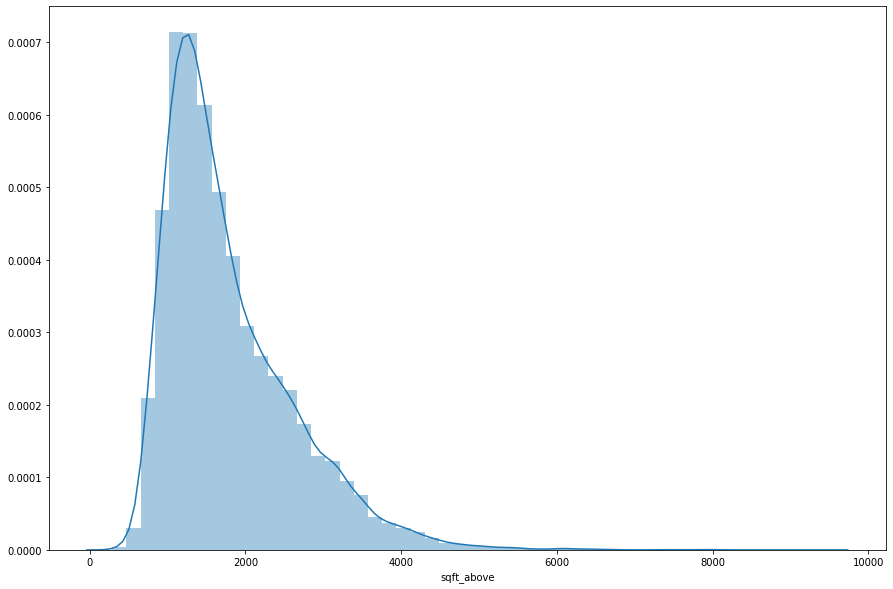

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)
plt.show()

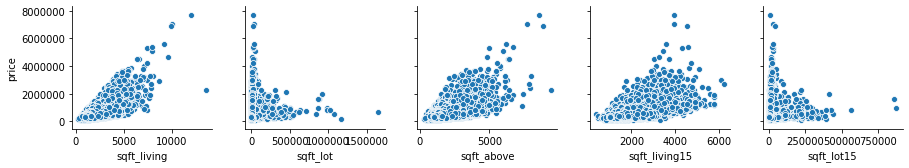

In [17]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["price"])
plt.show()

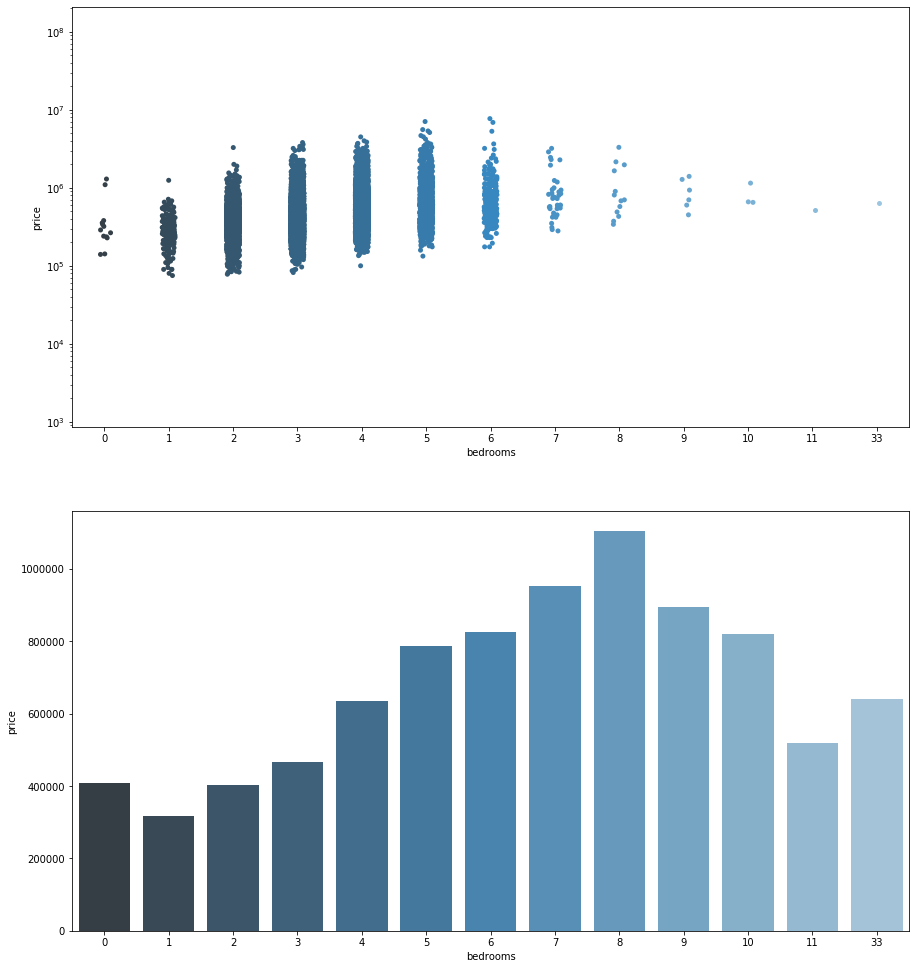

In [18]:
# average price for no. of bedrooms in house
grpby_bedrooms_df = df[["price", "bedrooms"]].groupby(by = "bedrooms", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean()

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 17))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = df, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "bedrooms", y = "price", data = grpby_bedrooms_df, ax = ax2, palette="Blues_d")
plt.show()

In [19]:
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


## Correlation matrix 

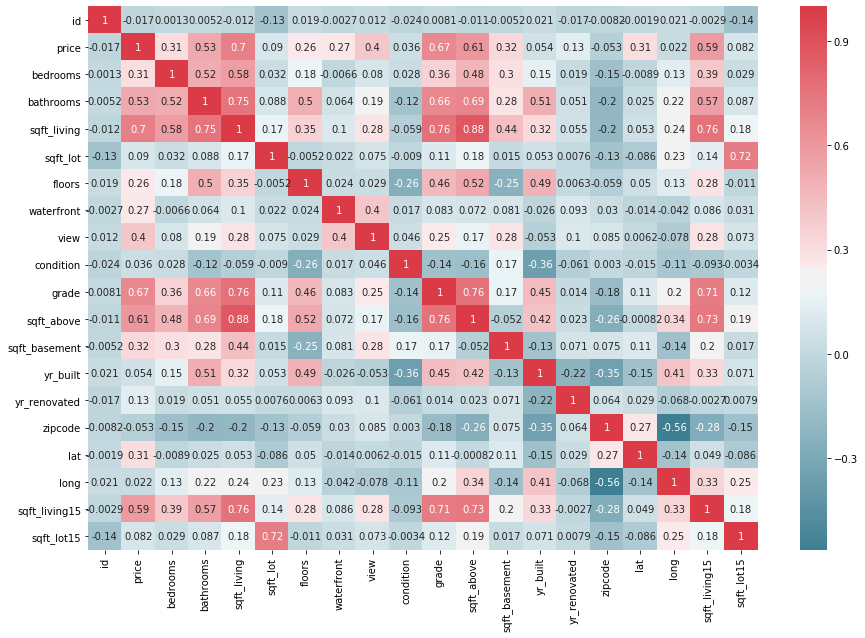

In [20]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

## Simple Linear regression

In [21]:
# split dataset in train and test (train - 80% and test - 20%)
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('Linear model: predicting price using living space (sqft)')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

Linear model: predicting price using living space (sqft)
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


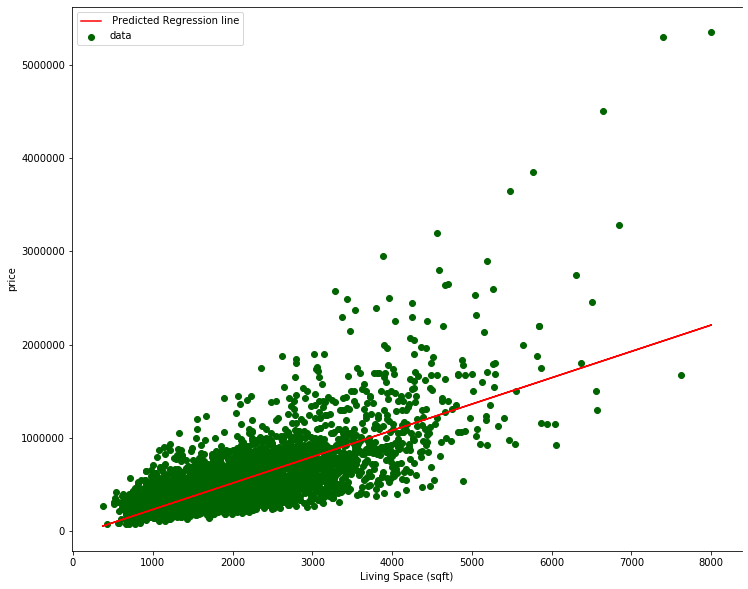

In [22]:
# regression fit plot
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

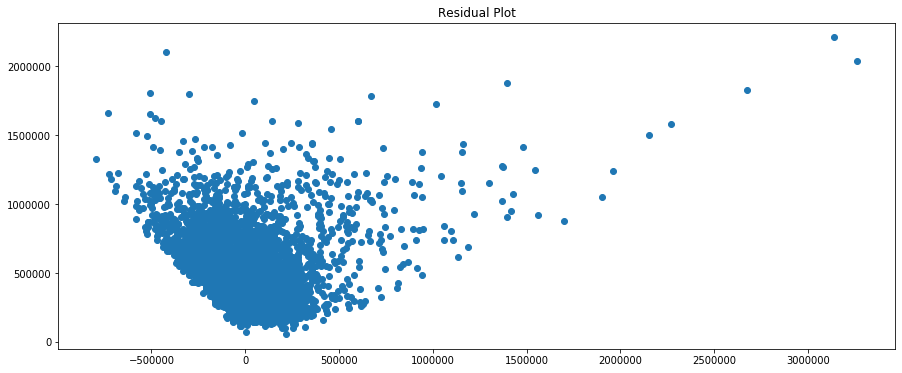

In [23]:
# residual plot
residual = y_test - pred
fig, ax = plt.subplots(figsize=(15,6))
_ = ax.scatter(residual, pred)
plt.title('Residual Plot')
plt.show()

In [24]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('Linear model: predicting price using grade')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

Linear model: predicting price using grade
squared mean error 263387.61
R squared training 0.442
R squared testing 0.46
intercept [-1061459.62144314]
coeeficient [[209225.48270386]]


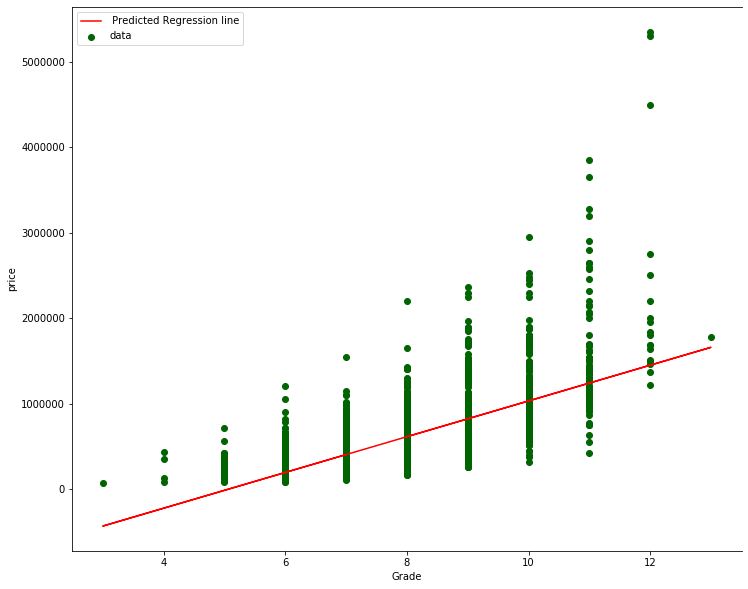

In [25]:
# regression fit plot
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Grade')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

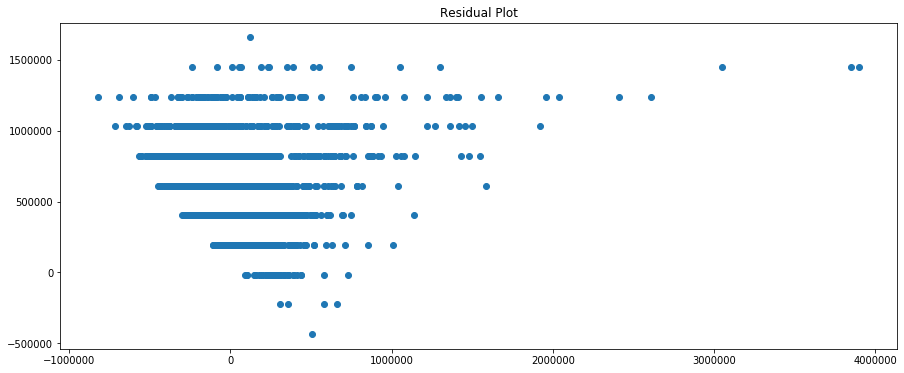

In [26]:
# residual plot
residual = y_test - pred
fig, ax = plt.subplots(figsize=(15,6))
_ = ax.scatter(residual, pred)
plt.title('Residual Plot')
plt.show()

## Multiple Linear Regression

In [27]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('Model 1: predicting house price using bedroom,grade,sqft_living and sqft_above')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Model 1: predicting house price using bedroom,grade,sqft_living and sqft_above
mean squared error(MSE) 239014.4
R squared training 0.548
R squared training 0.555
Intercept:  -523645.7841467742
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


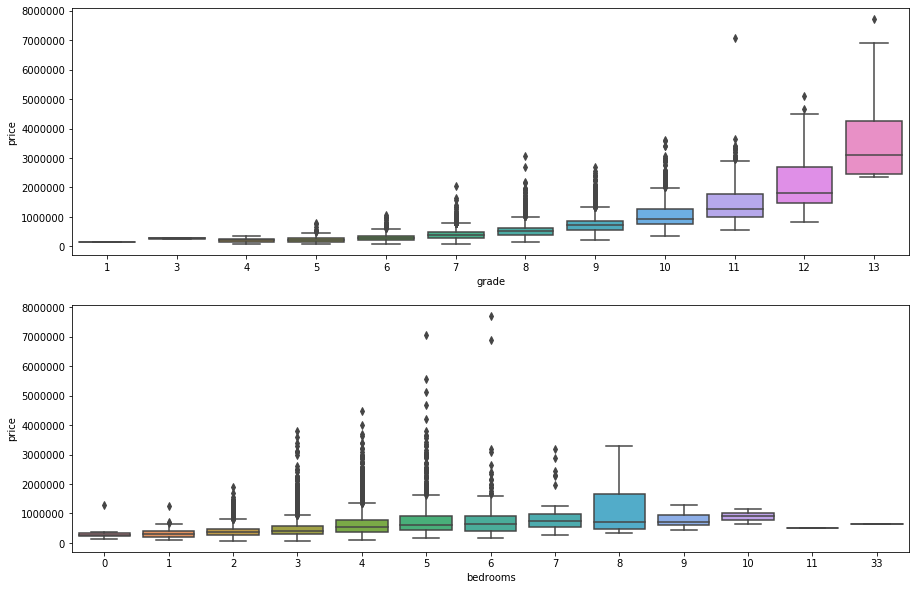

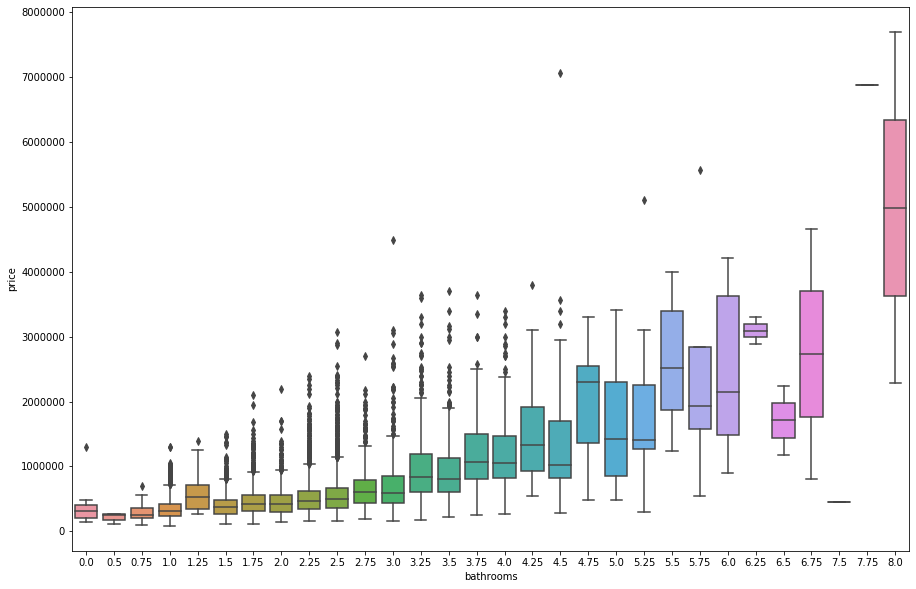

In [28]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])
plt.show()

In [29]:
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Model_2 - Predicting house prices using features:',features1)
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Model_2 - Predicting house prices using features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
Mean Squared Error (MSE)  205244.56
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.91167583
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


## Polynomial Regression

In [30]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Model_3
Mean Squared Error (MSE)  175814.11
R-squared (training)  0.758
R-squared (testing)  0.759


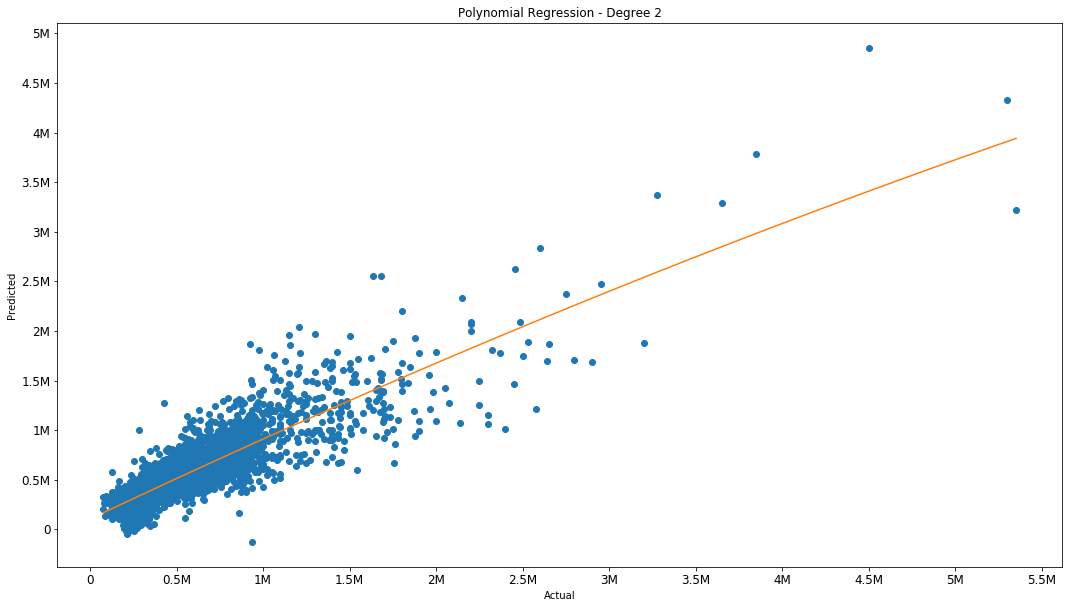

In [31]:
import numpy as np
z = np.polyfit(y_test.ravel(),polypred,2) 

p = np.poly1d(z)
plt.figure(figsize=(18,10))
plt.title ('Polynomial Regression - Degree 2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M'], fontsize = 12)
plt.xticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M'], fontsize = 12)

datax_os = np.linspace(y_test.min(), y_test.max(), 50)
plt.plot(y_test, polypred, 'o',datax_os, p(datax_os) ) # 'smoother' line

plt.show()


In [32]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Model_4
Mean Squared Error (MSE)  207567.72
R-squared (training)  0.776
R-squared (testing)  0.664


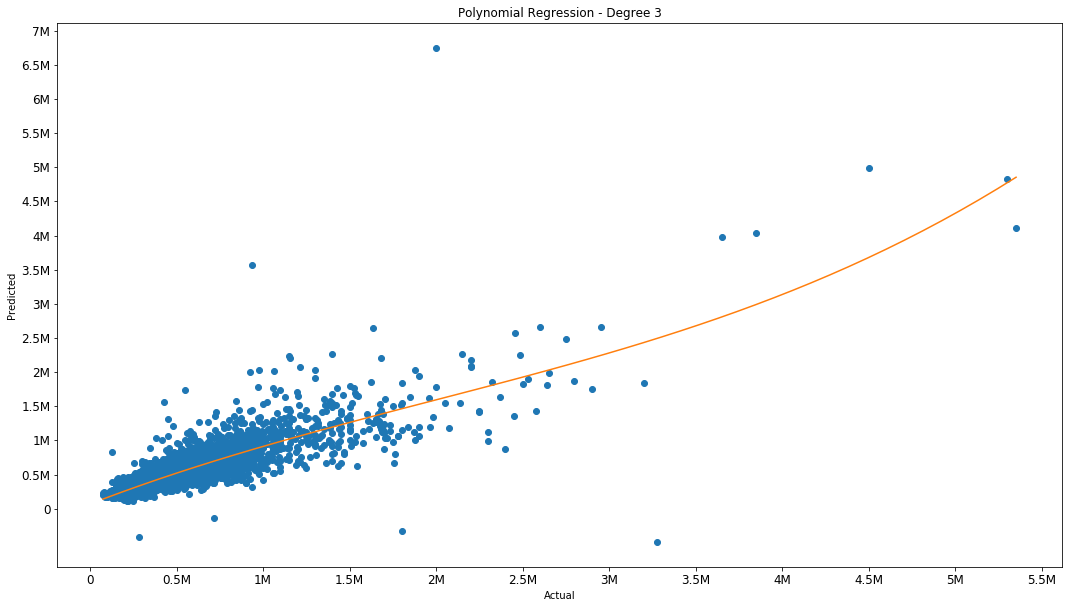

In [33]:
# Plot polynomial fit plot
z = np.polyfit(y_test.ravel(),polypred,3) 

p = np.poly1d(z)
plt.figure(figsize=(18,10))
plt.title ('Polynomial Regression - Degree 3')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M'], fontsize = 12)
plt.xticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M'], fontsize = 12)
    
datax_os = np.linspace(y_test.min(), y_test.max(), 50)
plt.plot(y_test, polypred, 'o',datax_os, p(datax_os) ) # 'smoother' line

plt.show()

## Conclusion
Model_3 gives us R-squared (testing) score of 0.759. We can conclude that Polynomial regression with degree 2 is best solution. Predicting house prices is an extremely complex and challenging problems because houses vary widely and house prices are not only based on the physical properties of a house but also on the emotional, social and financial position of the parties involved. Results indicate that in order to provide accurate predictions of house prices, a very large number of features must be used and that they most likely need to be combined with a powerful,complex and non-linear model.